In [1]:
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

dimension de X est :(100, 2), et de y est : (100, 1)


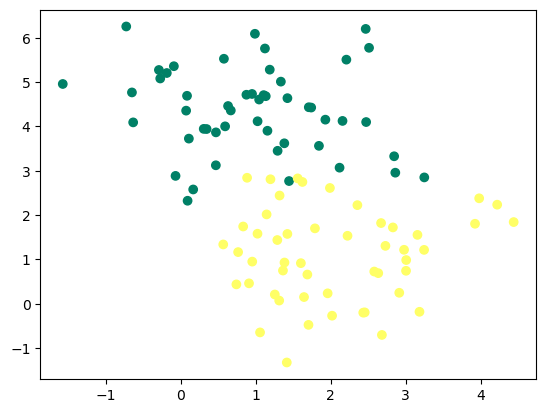

In [2]:
X,y = make_blobs(n_samples=100,n_features=2,centers=2,random_state=0)
y=y.reshape((y.shape[0],1))

print(f"dimension de X est :{X.shape}, et de y est : {y.shape}")

plt.scatter(X[:,0],X[:,1],c=y,cmap='summer')
plt.show()

## fonction d'initialisation:

In [3]:
def initi(X):
    W=np.random.randn(X.shape[1],1)
    b=np.random.randn(1)
    return(W,b)

In [4]:
W,b=initi(X)
print(W.shape)
print(b.shape)

(2, 1)
(1,)


## fonction du modele

In [5]:
def model(X,W,b):
    Z=X.dot(W)+b
    A=1/(1+np.exp(-Z))
    return A

In [6]:
A=model(X,W,b)
A.shape

(100, 1)

## cost

In [7]:
def logloss(A,y):
    return -1/len(y)*np.sum(-y*np.log(A)+(1-y)*np.log(1-A))

In [8]:
logloss(A,y)

0.30320664446364265

## gradient

In [9]:
def gradient(A,X,y):
    dW=1/len(y)*np.dot(X.T,A-y)
    db=1/len(y)*np.sum(A-y)
    return (dW,db)

In [10]:
dw , db = gradient(A,X,y)
dw.shape

(2, 1)

In [20]:
def predict(X,W,b):
    A=model(X,W,b)
    print(A)
    return A>=0.5

## update

In [12]:
def update(W,b,dW,db,learning_rate):
    W=W-learning_rate*dW
    b=b-learning_rate*db
    return (W,b)

## assemblage

In [13]:
from sklearn.metrics import accuracy_score

def neurone(X,Y,learning_rate = 0.1,n_iteration = 100):
    W,b = initi(X)
    Loss = []
    for i in range(n_iteration):
        A=model(X,W,b)
        Loss.append(logloss(A,y))
        dW,db = gradient(A,X,Y)
        W,b = update(W,b,dW,db,learning_rate)
        
    y_pred = predict(X,W,b)
    print(accuracy_score(y,y_pred))
    plt.plot(Loss)
    plt.show()
    
    return (W,b)


0.92


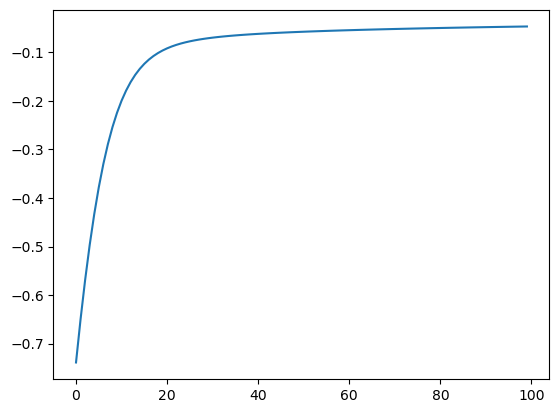

In [14]:
W,b = neurone(X,y)

In [15]:
W,b

(array([[ 0.89358949],
        [-1.20105174]]),
 array([1.54636511]))

## effectuer des nouvelles prediction

C:\Users\PC\AppData\Local\Temp\ipykernel_8812\2016479259.py:6: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(new[0],new[1],cmap='r')


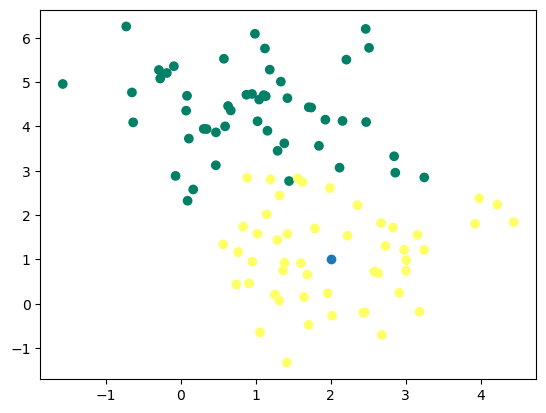

[0.89402138]


array([ True])

In [24]:
new = np.array([2,1])



plt.scatter(X[:,0],X[:,1],c=y,cmap='summer')
plt.scatter(new[0],new[1],cmap='r')
plt.show()
predict(new,W,b)

## tracer la frontiere de decision 

C:\Users\PC\AppData\Local\Temp\ipykernel_8812\1159999129.py:7: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(new[0],new[1],cmap='r')


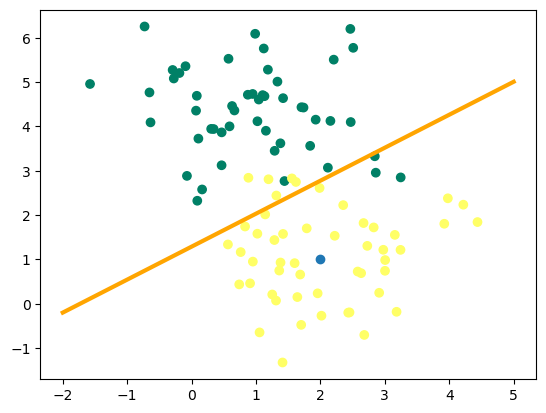

In [25]:
new = np.array([2,1])

x0 = np.linspace(-2,5,100)
x1 = (-W[0]*x0-b)/W[1]

plt.scatter(X[:,0],X[:,1],c=y,cmap='summer')
plt.scatter(new[0],new[1],cmap='r')
plt.plot(x0,x1,c='orange',lw=3)
plt.show()